In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [14]:
aobc = pd.read_csv('aobc.csv')
aobc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,8.93,8.95,8.51,8.54,8.54,4875000
1,2013-01-03,8.65,8.93,8.54,8.77,8.77,5051200
2,2013-01-04,8.90,8.96,8.71,8.80,8.80,3799700
3,2013-01-07,8.88,8.89,8.46,8.64,8.64,3773900
4,2013-01-08,8.65,8.78,8.58,8.76,8.76,2932200


In [16]:
aobc.Date = pd.to_datetime(aobc.Date)

In [17]:
df = aobc[['Date', 'Close']]

In [19]:
df.rename(columns = {'Date': 'ds', 'Close':'y'},
         inplace=True)

/Users/cricket/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [25]:
print(df.head())
print(df.tail())

          ds     y
0 2013-01-02  8.54
1 2013-01-03  8.77
2 2013-01-04  8.80
3 2013-01-07  8.64
4 2013-01-08  8.76
             ds      y
1315 2018-03-23   9.84
1316 2018-03-26   9.61
1317 2018-03-27   9.76
1318 2018-03-28   9.89
1319 2018-03-29  10.32


In [22]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/cricket/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [24]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
1680,2019-03-25
1681,2019-03-26
1682,2019-03-27
1683,2019-03-28
1684,2019-03-29


In [26]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1680,2019-03-25,1.103956,-4.231850,6.498370
1681,2019-03-26,1.039484,-4.489027,6.902693
1682,2019-03-27,0.952271,-4.488933,7.084902
1683,2019-03-28,0.906604,-4.637685,6.431711
1684,2019-03-29,0.773040,-4.741681,6.468024


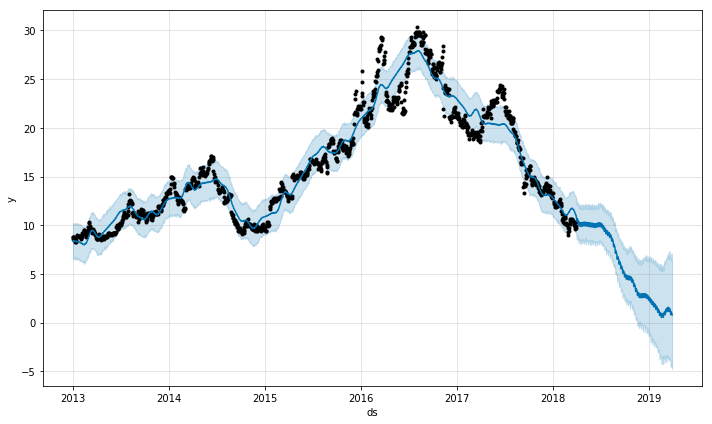

In [27]:
fig1= m.plot(forecast)

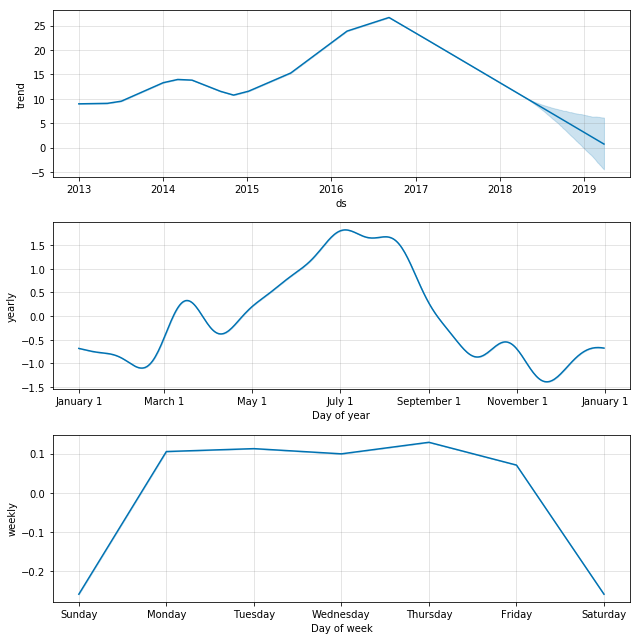

In [29]:
fig2 = m.plot_components(forecast)

In [30]:
df_cv = cross_validation(m, horizon = '365 days')
df_cv.tail()

INFO:fbprophet.diagnostics:Making 3 forecasts with cutoffs between 2016-03-29 00:00:00 and 2017-03-29 00:00:00
/Users/cricket/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
752,2018-03-23,13.856388,6.625354,20.435044,9.84,2017-03-29
753,2018-03-26,13.589219,6.713811,20.049996,9.61,2017-03-29
754,2018-03-27,13.506058,6.527428,20.242829,9.76,2017-03-29
755,2018-03-28,13.375197,6.110406,20.038493,9.89,2017-03-29
756,2018-03-29,13.300227,6.283692,20.240892,10.32,2017-03-29


In [33]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
278,35 days 12:00:00,11.650215,3.413241,2.949060,0.127216,0.200000
25,36 days 00:00:00,12.146097,3.485125,3.010883,0.130072,0.200000
529,36 days 00:00:00,12.217679,3.495380,3.038318,0.131388,0.186667
279,36 days 12:00:00,12.278325,3.504044,3.058478,0.132009,0.173333
26,37 days 00:00:00,12.738312,3.569077,3.115281,0.134620,0.173333


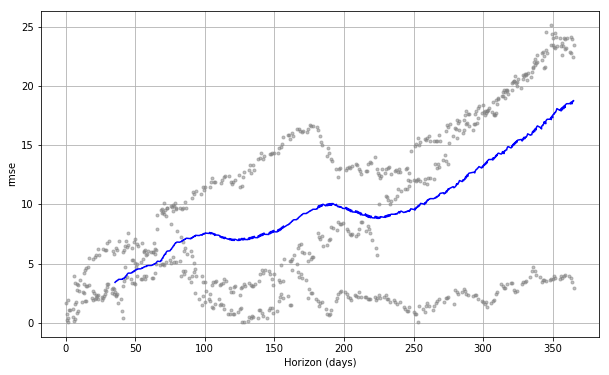

In [32]:
fig3 = plot_cross_validation_metric(df_cv, metric = 'rmse')

In [34]:
import fix_yahoo_finance as yf 
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
 aobc = yf.download('AOBC','2013-01-01','2018-10-17')

[*********************100%***********************]  1 of 1 downloaded


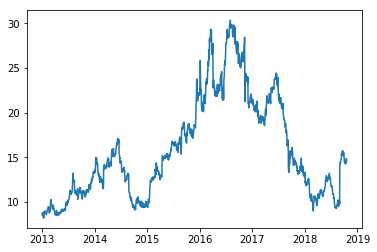

In [36]:
plt.plot(aobc.Close)

## Main Takeaway:
### I can see that FB Prophet can't predict longer-term stock market trends very well. For instance, on the AOBC stock, it saw a negative trend and predicted that it would continue, which it turns out did not happen.